In [29]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')

### Task #1: Merge the 12 months of sales data into a single CSV file

In [30]:
# Read the sales data from each month into a list of dataframes

files = [file for file in os.listdir('C:\\Users\\Sajed Tabikh\\Desktop\\Projects\\Pandas-Data-Science-Tasks-master\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data')]

# Concatenate the dataframes into a single dataframe

combined_df = pd.concat([pd.read_csv('C:\\Users\\Sajed Tabikh\\Desktop\\Projects\\Pandas-Data-Science-Tasks-master\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\' + file) for file in files])

# Save the combined dataframe to a CSV file

combined_df.to_csv('combined_sales_data.csv', index=False)

In [31]:
combined_df = pd.read_csv('C:\\Users\\Sajed Tabikh\\Desktop\\Projects\\Pandas-Data-Science-Tasks-master\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Solution\\Output\\all_data.csv')

In [32]:
print(combined_df.shape)
combined_df.head()

(186850, 6)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data

In [33]:
# Show missing values

combined_df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [34]:
# Find NaN values in the dataframe

nan_df = combined_df[combined_df.isna().any(axis=1)]
print(nan_df.shape)
nan_df.head()

(545, 6)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# remove NaN values

combined_df.dropna(inplace=True)

combined_df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [36]:
# Check for duplicate rows and remove them

combined_df.drop_duplicates(inplace=True)

### Augment data with additional columns

### Task #2: Add Month Column

In [37]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185687 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185687 non-null  object
 1   Product           185687 non-null  object
 2   Quantity Ordered  185687 non-null  object
 3   Price Each        185687 non-null  object
 4   Order Date        185687 non-null  object
 5   Purchase Address  185687 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [38]:
# Add month column to the dataframe

combined_df['Month'] = pd.to_datetime(combined_df['Order Date'], infer_datetime_format=True, errors='coerce').dt.month

combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4.0
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4.0
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4.0


### Question 1: What was the best month for sales? How much was earned that month?

In [39]:
# Convert Quantity Ordered and Price Each columns to numeric

combined_df['Quantity Ordered'] = pd.to_numeric(combined_df['Quantity Ordered'], errors='coerce')
combined_df['Price Each'] = pd.to_numeric(combined_df['Price Each'], errors='coerce')

In [40]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185687 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185687 non-null  object 
 1   Product           185687 non-null  object 
 2   Quantity Ordered  185686 non-null  float64
 3   Price Each        185686 non-null  float64
 4   Order Date        185687 non-null  object 
 5   Purchase Address  185687 non-null  object 
 6   Month             185686 non-null  float64
dtypes: float64(3), object(4)
memory usage: 11.3+ MB


In [41]:
# Create a neew column to calculate the total sales

combined_df['Total Sales'] = combined_df['Quantity Ordered'] * combined_df['Price Each']
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4.0,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4.0,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4.0,11.99


In [42]:
# Display a datframe showing best month for sales and how much was earned that month

best_month_df = combined_df.groupby('Month').sum()['Total Sales'].reset_index()
best_month_df.sort_values('Total Sales', ascending=False, inplace=True)
best_month_df


,Month,Total Sales
11,12.0,4608295.70
9,10.0,3734777.86
3,4.0,3389217.98
10,11.0,3197875.05
4,5.0,3150616.23
2,3.0,2804973.35
6,7.0,2646461.32
5,6.0,2576280.15
7,8.0,2241083.37
1,2.0,2200078.08


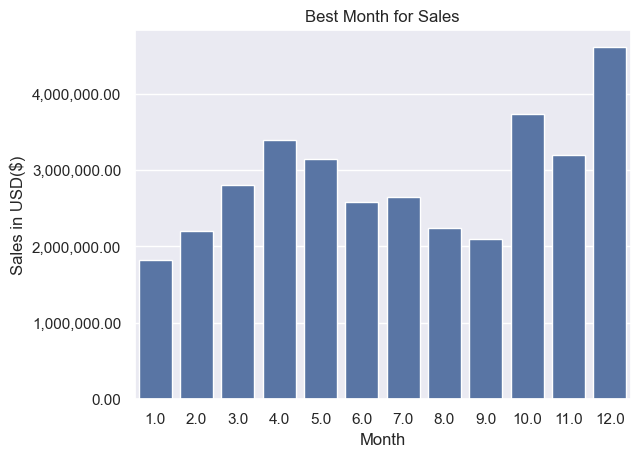

In [43]:
import matplotlib.ticker as ticker

# Create the bar plot
ax = sns.barplot(x='Month', y='Total Sales', data=best_month_df)

# Set axis labels and title
plt.xlabel('Month')
plt.ylabel('Sales in USD($)')
plt.title('Best Month for Sales')

# Format y-axis to show exact values
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.2f}'))

# Show the plot
plt.show()


### Question number 2: What City had the highest number of sales?

In [44]:
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4.0,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4.0,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4.0,11.99


In [45]:
print(combined_df['Purchase Address'].head(10))


0               917 1st St, Dallas, TX 75001
2          682 Chestnut St, Boston, MA 02215
3       669 Spruce St, Los Angeles, CA 90001
4       669 Spruce St, Los Angeles, CA 90001
5          333 8th St, Los Angeles, CA 90001
6     381 Wilson St, San Francisco, CA 94016
7           668 Center St, Seattle, WA 98101
8            790 Ridge St, Atlanta, GA 30301
9     915 Willow St, San Francisco, CA 94016
10               83 7th St, Boston, MA 02215
Name: Purchase Address, dtype: object


In [46]:
def extract_city(address):
    parts = address.split(', ')
    return parts[1] if len(parts) > 1 else 'Unknown'

combined_df['City'] = combined_df['Purchase Address'].apply(extract_city)


In [47]:
# What city have the highest number of sales?

city_sales_df = combined_df.groupby('City').sum()['Total Sales'].reset_index()
city_sales_df.sort_values('Total Sales', ascending=False, inplace=True)
city_sales_df

,City,Total Sales
7,San Francisco,8254743.55
4,Los Angeles,5448304.28
5,New York City,4661867.14
2,Boston,3658627.65
0,Atlanta,2794199.07
3,Dallas,2765373.96
8,Seattle,2745046.02
6,Portland,2319331.94
1,Austin,1818044.33
9,Unknown,0.00


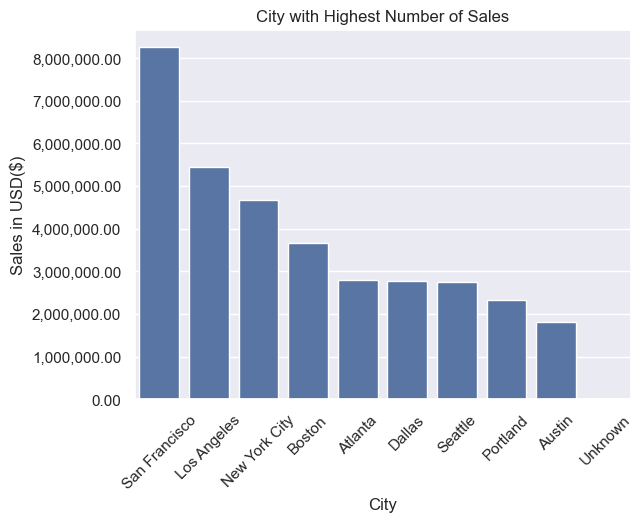

In [48]:
# Plot a bar plot to show the city with the highest number of sales

ax = sns.barplot(x='City', y='Total Sales', data=city_sales_df)
plt.xlabel('City')
plt.ylabel('Sales in USD($)')
plt.title('City with Highest Number of Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# Format y-axis to show exact values
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.2f}'))
plt.show()

### Question 3: What time should we display advertisements to maximize customer buying product?

In [49]:
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4.0,23.90,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4.0,99.99,Boston
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4.0,11.99,Los Angeles


In [50]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185687 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185687 non-null  object 
 1   Product           185687 non-null  object 
 2   Quantity Ordered  185686 non-null  float64
 3   Price Each        185686 non-null  float64
 4   Order Date        185687 non-null  object 
 5   Purchase Address  185687 non-null  object 
 6   Month             185686 non-null  float64
 7   Total Sales       185686 non-null  float64
 8   City              185687 non-null  object 
dtypes: float64(4), object(5)
memory usage: 14.2+ MB


In [51]:
# Print problematic rows where date conversion failed
invalid_dates = combined_df.loc[~pd.to_datetime(combined_df['Order Date'], errors='coerce').notna(), 'Order Date']
print(invalid_dates.head(10))
combined_df['Order Date'] = pd.to_datetime(combined_df['Order Date'], errors='coerce')
print(combined_df['Order Date'].isna().sum())
combined_df = combined_df.dropna(subset=['Order Date'])


519    Order Date
Name: Order Date, dtype: object
1


In [52]:
# We need to add a new column to show the hour of the order date

combined_df['Hour'] = pd.to_datetime(combined_df['Order Date']).dt.hour
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,99.99,Boston,22
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles,14
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles,14
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,11.99,Los Angeles,9


In [54]:
# What time should we display advertisements to maximize customer buying product?

combined_df['Hour'] = combined_df['Hour'].astype(int)  # Convert Hour to integer if it's not already
# Group by 'Hour' and sum only numeric columns
hour_sales_df = combined_df.groupby('Hour').agg({'Total Sales': 'sum'}).reset_index()
hour_sales_df.sort_values('Total Sales', ascending=False, inplace=True)
hour_sales_df.head()


,Hour,Total Sales
19,19,2411971.14
12,12,2314359.85
11,11,2296619.84
20,20,2280784.36
18,18,2218374.01


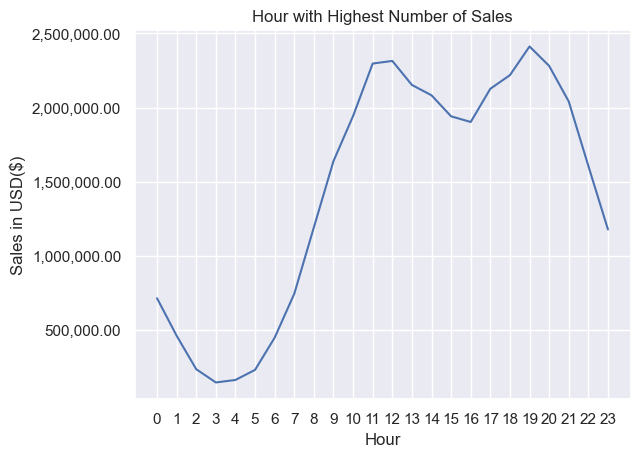

In [55]:
# plot a line chart plot to show the time with the highest number of sales

ax = sns.lineplot(x='Hour', y='Total Sales', data=hour_sales_df)
plt.xlabel('Hour')
plt.ylabel('Sales in USD($)')
plt.title('Hour with Highest Number of Sales')
plt.xticks(range(0, 24))  # Show hours from 0 to 23

# Format y-axis to show exact values

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.2f}'))

plt.show()

### Question 4: What products are most sold together?

In [56]:
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,99.99,Boston,22
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles,14
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles,14
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,11.99,Los Angeles,9


In [57]:
df_grouped1 = combined_df[combined_df['Order ID'].duplicated(keep=False)]

In [58]:
df_grouped1['Grouped Products'] = df_grouped1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df_grouped1 = df_grouped1[['Order ID', 'Grouped Products']].drop_duplicates()

In [59]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df_grouped1['Grouped Products']:
    row_list = row.split(',')
    count.update(combinations(row_list, 2))

most_sold_together_df = pd.DataFrame(count.most_common(10), columns=['Products', 'Count'])

In [60]:
most_sold_together_df

,Products,Count
0,"(iPhone, Lightning Charging Cable)",1002
1,"(Google Phone, USB-C Charging Cable)",985
2,"(iPhone, Wired Headphones)",447
3,"(Google Phone, Wired Headphones)",413
4,"(Vareebadd Phone, USB-C Charging Cable)",361
5,"(iPhone, Apple Airpods Headphones)",360
6,"(Google Phone, Bose SoundSport Headphones)",220
7,"(USB-C Charging Cable, Wired Headphones)",159
8,"(Vareebadd Phone, Wired Headphones)",143
9,"(Lightning Charging Cable, Wired Headphones)",92


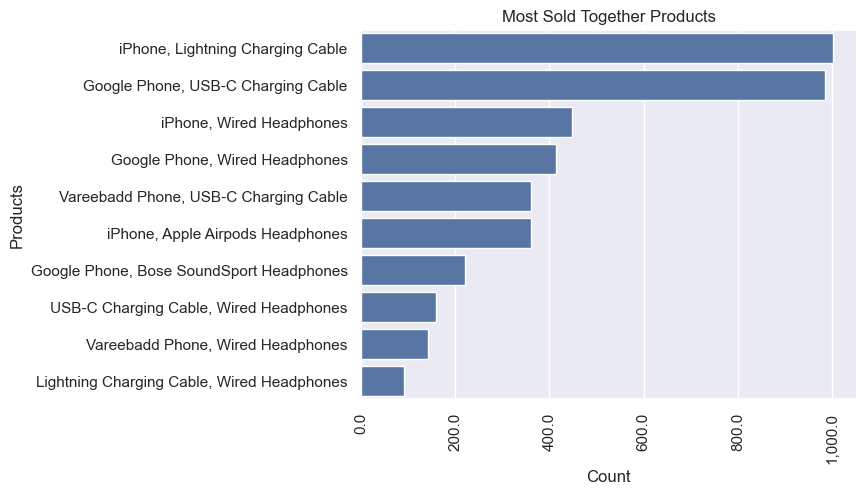

In [61]:
# Convert the tuples in the 'Products' column to strings
most_sold_together_df['Products'] = most_sold_together_df['Products'].apply(lambda x: ', '.join(x))

# Create the bar chart
ax = sns.barplot(x='Count', y='Products', data=most_sold_together_df)
plt.xlabel('Count')
plt.ylabel('Products')
plt.title('Most Sold Together Products')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Format y-axis to show exact values
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,}'))

plt.show()

### Question #5 What product is sold the most?

In [62]:
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,99.99,Boston,22
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles,14
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles,14
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,11.99,Los Angeles,9


In [63]:
# We need to show the uniqueness of each product by counting the number of times each product appears in the 'Product' column

product_sales_df = combined_df['Product'].value_counts().reset_index()
product_sales_df.columns = ['Product', 'Count']
product_sales_df

,Product,Count
0,USB-C Charging Cable,21859
1,Lightning Charging Cable,21610
2,AAA Batteries (4-pack),20612
3,AA Batteries (4-pack),20558
4,Wired Headphones,18849
5,Apple Airpods Headphones,15525
6,Bose SoundSport Headphones,13298
7,27in FHD Monitor,7498
8,iPhone,6840
9,27in 4K Gaming Monitor,6225


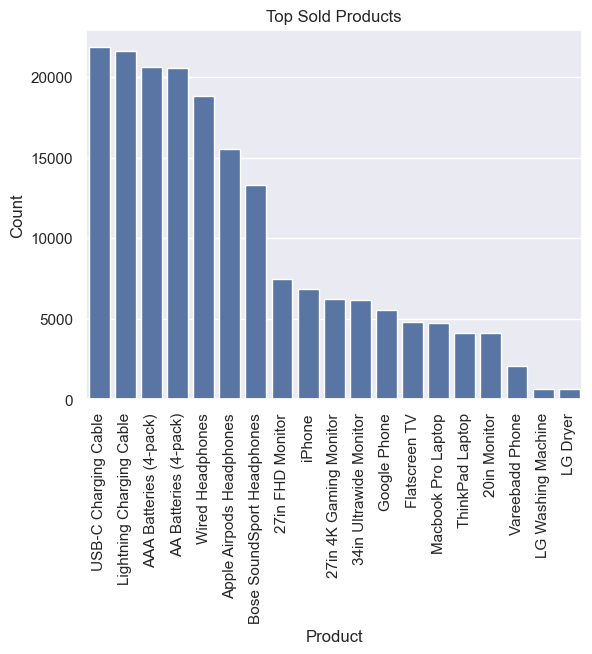

In [64]:
# plot a bar chart to show the most sold product

ax = sns.barplot(x='Product', y='Count', data=product_sales_df)
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Top Sold Products')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [65]:
combined_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,99.99,Boston,22
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles,14
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles,14
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,11.99,Los Angeles,9
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9.0,8.97,Los Angeles,20
186846,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9.0,700.00,San Francisco,16
186847,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9.0,700.00,San Francisco,7
186848,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9.0,379.99,San Francisco,17
